# Ejercicio de programación Regresión Lineal Multiple

# Ejercicio de programación Regresión Lineal Multiple

In [4]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot 
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

import pandas as pd

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline



## 2 Regresión lineal con multiples variables

Se implementa la regresion lineal multivariable para predecir el precio de las casas. El archivo `Datasets/ex1data2.txt` contiene un conjunto de entrenamiento de precios de casas en Portland, Oregon. La primera columna es el tamaño de la casa en metros cuadrados, la segunda columna es el numero de cuartos, y la tercera columna es el precio de la casa. 

<a id="section4"></a>
### 2.1 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

In [5]:
# Cargar datos


'''
ESTUDIANTE: Victoria Avila Carlos Osmar
CARRERA: Ingeniería en Ciencias de la Computación
CU: 111-333

INFORMACIÓN SOBRE EL CONJUNTO DE DATOS:
El conjunto de datos contiene características y expectativas de vida de 193 países de 2000 a 2015.
Columnas X
x1 = Año
x2 = Mortalidad infantil
x3 = Mortalidad de menores de cinco años
x4 = Mortalidad adulta
x5 = Muerte por consumo de Alcohol
x6 = Hepatitis B
x7 = Sarampión
x8 = IMC
x9 = Polio
x10 = Difteria
x11 = VIH / SIDA

Columna Y
Y = Esperanza de vida

'''
# Total de tados en el dataset 2.864 rows.
# 2.577 rows para entrenamiento (90%)
# 287 rows para test (10%) (el test se realiza al final del notebook)

#lee el los valores del archivo csv
df = pd.read_csv('diabetes.csv')
#Omite la parte de los encabezados
data = df.values

amount_rows = data.shape[0]
# 90% de los datos para entrenamiento
train_rows= int(round(amount_rows * 0.9))
X = data[:train_rows, :8]
y = data[:train_rows, 8]
m = y.size

# print(X[:,10])
# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'y'))
print('-'*27)
for i in range(10):
    print('{:8.0f}{:8.0f}{:>8.0f}{:>8.0f}{:>8.0f}{:>8.0f}{:>8.0f}{:>8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], X[i, 6], X[i, 7],  y[i]))

  X[:,0] X[:, 1] X[:, 2] X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]   X[:, 8]
---------------------------
       6     148      72      35       0      34       1      50         1
       1      85      66      29       0      27       0      31         0
       8     183      64       0       0      23       1      32         1
       1      89      66      23      94      28       0      21         0
       0     137      40      35     168      43       2      33         1
       5     116      74       0       0      26       0      30         0
       3      78      50      32      88      31       0      26         1
      10     115       0       0       0      35       0      29         0
       2     197      70      45     543      30       0      53         1
       8     125      96       0       0       0       0      54         1


# New Section

## 2 Regresión lineal con multiples variables

Se implementa la regresion lineal multivariable para predecir el precio de las casas. El archivo `Datasets/ex1data2.txt` contiene un conjunto de entrenamiento de precios de casas en Portland, Oregon. La primera columna es el tamaño de la casa en metros cuadrados, la segunda columna es el numero de cuartos, y la tercera columna es el precio de la casa. 

<a id="section4"></a>
### 2.1 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

La desviación estándar es una forma de medir cuánta variación hay en el rango de valores de una característica en particular (la mayoría de los puntos caeran en un rango de ± 2 en relación a la desviaciones estándar de la media); esta es una alternativa a tomar el rango de valores (max-min). En `numpy`, se puede usar la función `std` para calcular la desviacion estandar. 

Por ejemplo, la caracteristica`X[:, 0]` contiene todos los valores de $x_1$ (tamaño de las casas) en el conjunto de entrenamiento, entonces `np.std(X[:, 0])` calcula la desviacion estandar de los tamaños de las casas.
En el momento en que se llama a la función `featureNormalize`, la columna adicional de unos correspondiente a $ x_0 = 1 $ aún no se ha agregado a $ X $. 

<div class="alert alert-block alert-warning">
**Notas para la implementación:** Cuando se normalize una caracteristica, es importante almacenar los valores usados para la normalización - el valor de la media y el valor de la desviación estandar usado para los calculos. Despues de aprender los parametros del modelo, se deseara predecir los precios de casas que no se han visto antes. Dado un nuevo valor de x (area del living room y el numero de dormitorios), primero se debe normalizar x usando la media y la desviacion estandar que se empleo anteriormente en el conjunto de entrenamiento para entrenar el modelo.
</div>
<a id="featureNormalize"></a>

In [6]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [7]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  1.    140.     74.    ...  24.1     0.828  23.   ]
 [  1.    144.     82.    ...  46.1     0.335  46.   ]
 [  8.    107.     80.    ...  24.6     0.856  34.   ]]
Media calculada: [  3.81620839 120.44283647  68.85962373  20.45296671  79.50217077
  31.86136035   0.4765398   33.14327062]
Desviación estandar calculada: [  3.35667003  32.26640401  19.36792011  16.00213541 115.03306482
   7.95099119   0.33778446  11.81054106]
[[ 0.65058275  0.85405128  0.16214319 ...  0.21866955  0.44543258
   1.4272614 ]
 [-0.83898875 -1.09844396 -0.14764744 ... -0.66172383 -0.37165652
  -0.18147099]
 [ 1.24641135  1.93877085 -0.25091098 ... -1.07676642  0.57865363
  -0.09680087]
 ...
 [-0.83898875  0.60611537  0.26540673 ... -0.97615004  1.0404866
  -0.858832  ]
 [-0.83898875  0.73008333  0.67846089 ...  1.79080058 -0.41902401
   1.088

Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

In [8]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [9]:
print(X)

[[ 1.          0.65058275  0.85405128 ...  0.21866955  0.44543258
   1.4272614 ]
 [ 1.         -0.83898875 -1.09844396 ... -0.66172383 -0.37165652
  -0.18147099]
 [ 1.          1.24641135  1.93877085 ... -1.07676642  0.57865363
  -0.09680087]
 ...
 [ 1.         -0.83898875  0.60611537 ... -0.97615004  1.0404866
  -0.858832  ]
 [ 1.         -0.83898875  0.73008333 ...  1.79080058 -0.41902401
   1.0885809 ]
 [ 1.          1.24641135 -0.41662022 ... -0.9132648   1.12337969
   0.07253938]]


<a id="section5"></a>
### 2.2 Descenso por el gradiente

En el ejemplo anterior se implemento el descenso por el gradiente para un problema de regresion univariable. La unica diferencia es que ahora existe una caracteristica adicional en la matriz $X$. La función de hipótesis y la regla de actualización del descenso del gradiente por lotes permanecen sin cambios.

La implementacion de las funciones `computeCostMulti` y `gradientDescentMulti` son similares a la funcion de costo y función de descenso por el gradiente de la regresión lineal multiple es similar al de la regresion lineal multivariable. Es importante garantizar que el codigo soporte cualquier numero de caracteristicas y esten bien vectorizadas.

Se puede utilizar `shape`, propiedad de los arrays `numpy`, para identificar cuantas caracteristicas estan consideradas en el dataset.

<div class="alert alert-block alert-warning">
**Nota de implementación:** En el caso de multivariables, la función de costo puede se escrita considerando la forma vectorizada de la siguiente manera:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

donde:

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

La version vectorizada es eficiente cuando se trabaja con herramientas de calculo numericos computacional como `numpy`. 
</div>

<a id="computeCostMulti"></a>

In [10]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J


In [11]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


theta calculado por el descenso por el gradiente: [ 0.34298119  0.07397938  0.18149309 -0.04681268  0.00379188 -0.01851614
  0.11116127  0.05132864  0.0203234 ]
Costo final del descenso por el gradiente: 0.079


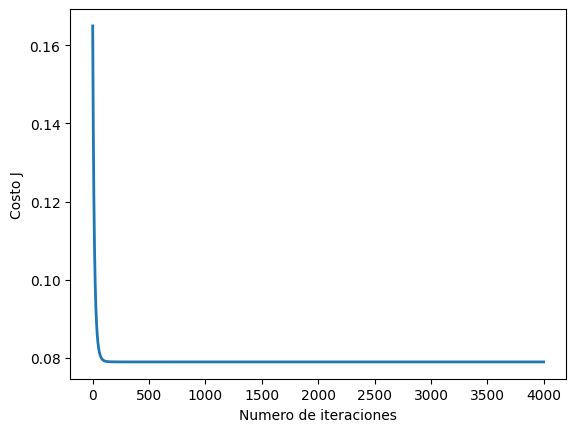

In [13]:
# Elegir algun valor para alpha (probar varias alternativas)
# Este es el learning rate más optimo para este dataset
alpha = 0.03 
# Este es el número de iteraciones más optimo para este dataset
num_iters = 4000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(9)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
#Los mejores valores para theta son: [68.81749418  0.10977902 -2.13952866 -1.74811408 -6.03021739  0.65771743
#  -0.26873256  0.08156761 -0.22281182 -0.12047186  0.20767683  0.40529647]
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# El mejor valor del costo llega a ser 1.059
print('Costo final del descenso por el gradiente: {:0.3f}'.format(J_history[-1]))   




# print('El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): ${:.0f}'.format(price))

In [16]:
# Pueba con el 10% que queda de elementos para la esperanza de vida como Y 

#lee el los valores del archivo csv
df = pd.read_csv('diabetes.csv')
#Omite la parte de los encabezados
data = df.values

amount_rows = data.shape[0]
test_rows= int(round(amount_rows * 0.1))
X = data[test_rows:, :8]
Life_Expectancy_data= data[test_rows:, 8]

X_norm, mu, sigma = featureNormalize(X)
X_final = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
Life_Expectancy = np.dot(X_final, theta)  



In [17]:
# impresion de los datos predecidos y los reales para su comparación
for i in range(test_rows):
    print("Ejemplo", i+1, "- Predicción:", Life_Expectancy[i], "- Valor real:", Life_Expectancy_data[i])


Ejemplo 1 - Predicción: 0.28551934116270555 - Valor real: 0.0
Ejemplo 2 - Predicción: 0.6118827511367458 - Valor real: 1.0
Ejemplo 3 - Predicción: 0.13090334214699934 - Valor real: 0.0
Ejemplo 4 - Predicción: 0.14304113810760707 - Valor real: 0.0
Ejemplo 5 - Predicción: -0.3279290455828569 - Valor real: 0.0
Ejemplo 6 - Predicción: 0.19043764279132303 - Valor real: 0.0
Ejemplo 7 - Predicción: 0.006696776353444896 - Valor real: 0.0
Ejemplo 8 - Predicción: 0.5858991703528771 - Valor real: 1.0
Ejemplo 9 - Predicción: 0.25486450114981607 - Valor real: 0.0
Ejemplo 10 - Predicción: 0.5159843752068333 - Valor real: 0.0
Ejemplo 11 - Predicción: 0.24645220807172302 - Valor real: 0.0
Ejemplo 12 - Predicción: 0.7144841006361085 - Valor real: 1.0
Ejemplo 13 - Predicción: 0.07330672545945076 - Valor real: 0.0
Ejemplo 14 - Predicción: -0.15193555657838442 - Valor real: 0.0
Ejemplo 15 - Predicción: 0.31342824542619346 - Valor real: 0.0
Ejemplo 16 - Predicción: 0.36642715693176287 - Valor real: 0.0
Eje

<a id="section7"></a>
### 2.3 Ecuacion de la Normal

Una manera de calcular rapidamente el modelo de una regresion lineal es:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Utilizando esta formula no requiere que se escale ninguna caracteristica, y se obtendra una solucion exacta con un solo calculo: no hay “bucles de convergencia” como en el descenso por el gradiente. 

Primero se recargan los datos para garantizar que las variables no esten modificadas. Recordar que no es necesario escalar las caracteristicas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección($\theta_0$). 

In [18]:
# Cargar datos

#lee el los valores del archivo csv
df = pd.read_csv('diabetes.csv')
#Omite la parte de los encabezados
data = df.values

amount_rows = data.shape[0]
# 90% de los datos para entrenamiento
train_rows= int(round(amount_rows * 0.9))
X = data[:train_rows, :8]
y = data[:train_rows, 8]
m = y.size
X, mu, sigma = featureNormalize(X)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [19]:
def normalEqn(X, y):
  
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [20]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y)

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)))

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios


Theta calculado a partir de la ecuación de la normal: [ 0.34298119  0.07397938  0.18149309 -0.04681268  0.00379188 -0.01851614
  0.11116127  0.05132864  0.0203234 ]


In [22]:
# Pueba con el 10% que queda de elementos para la esperanza de vida como Y 

#lee el los valores del archivo csv
df = pd.read_csv('diabetes.csv')
#Omite la parte de los encabezados
data = df.values

amount_rows = data.shape[0]
test_rows= int(round(amount_rows * 0.1))
X = data[test_rows:, :8]
Life_Expectancy_data= data[test_rows:, 8]

X_norm, mu, sigma = featureNormalize(X)
X_final = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
Life_Expectancy = np.dot(X_final, theta)  



In [23]:
# impresion de los datos predecidos y los reales
for i in range(test_rows):
    print("Ejemplo", i+1, "- Predicción:", Life_Expectancy[i], "- Valor real:", Life_Expectancy_data[i])

Ejemplo 1 - Predicción: 0.2855193411627065 - Valor real: 0.0
Ejemplo 2 - Predicción: 0.6118827511367458 - Valor real: 1.0
Ejemplo 3 - Predicción: 0.13090334214700075 - Valor real: 0.0
Ejemplo 4 - Predicción: 0.14304113810760863 - Valor real: 0.0
Ejemplo 5 - Predicción: -0.32792904558285546 - Valor real: 0.0
Ejemplo 6 - Predicción: 0.19043764279132408 - Valor real: 0.0
Ejemplo 7 - Predicción: 0.006696776353445878 - Valor real: 0.0
Ejemplo 8 - Predicción: 0.5858991703528776 - Valor real: 1.0
Ejemplo 9 - Predicción: 0.2548645011498169 - Valor real: 0.0
Ejemplo 10 - Predicción: 0.5159843752068352 - Valor real: 0.0
Ejemplo 11 - Predicción: 0.24645220807172327 - Valor real: 0.0
Ejemplo 12 - Predicción: 0.714484100636111 - Valor real: 1.0
Ejemplo 13 - Predicción: 0.07330672545945172 - Valor real: 0.0
Ejemplo 14 - Predicción: -0.15193555657838367 - Valor real: 0.0
Ejemplo 15 - Predicción: 0.3134282454261944 - Valor real: 0.0
Ejemplo 16 - Predicción: 0.3664271569317626 - Valor real: 0.0
Ejemplo